# Model Building

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [7]:
df = pd.read_csv('data.csv')

In [8]:
# Choosing relevant columns

In [9]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [11]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','employer_provided',
             'age','python_yn','spark','aws','excel','job_simp','seniority','desc_len']]

In [12]:
# get dummy data 
df_dum = pd.get_dummies(df_model)

In [13]:
df_dum

,avg_salary,Rating,employer_provided,age,python_yn,spark,aws,excel,desc_len,Size_1 to 50 Employees,...,Revenue_Unknown / Non-Applicable,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_na,seniority_senior
0,93.5,4.1,0,18,1,1,0,1,4564,0,...,0,0,0,0,0,0,0,1,1,0
1,93.5,3.7,0,81,0,0,0,1,2836,0,...,0,0,0,0,0,0,0,1,1,0
2,93.5,2.5,0,20,0,0,0,0,3157,0,...,0,0,0,0,0,0,0,1,1,0
3,93.5,2.8,0,20,1,1,0,1,2899,0,...,0,0,0,0,0,0,0,1,1,0
4,93.5,4.7,0,11,0,0,0,1,4277,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,289.5,3.2,0,20,0,0,1,1,3996,0,...,0,0,0,0,0,0,0,1,0,1
720,289.5,3.6,0,30,1,0,0,1,4022,0,...,0,1,0,0,0,0,0,0,0,1
721,289.5,3.6,0,13,1,1,1,0,3230,0,...,0,0,0,0,0,0,1,0,0,1
722,289.5,3.5,0,0,0,0,0,0,2681,0,...,0,0,0,0,0,0,0,1,1,0


In [14]:
# train test split 
from sklearn.model_selection import train_test_split

In [15]:
X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

In [16]:
X.shape

(724, 134)

In [17]:
y.shape

(724,)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [18]:
# multiple linear regression 
import statsmodels.api as sm

In [19]:
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.9417
Date:                Thu, 17 Sep 2020   Prob (F-statistic):              0.642
Time:                        09:41:47   Log-Likelihood:                -3709.8
No. Observations:                 724   AIC:                             7632.
Df Residuals:                     618   BIC:                             8118.
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                53.9835      8.120      6.648      0.000      38.037      69.930
Rating                                               -0.0270      2.921     -0.009      0.993      -5.764       5.710
employer_provided                                  7.364e-11   2.85e-11      2.583      0.010    1.76e-11     1.3e-10
age                                                   0.0017      0.079      0.021      0.983      -0.154       0.157
python_yn                                            -1.7076      4.301     -0.397      0.692     -10.155       6.740
spark                                                 2.0722      4.711      0.440      0.660      -7.180      11.324
aws                                                   0.2889      4.547      0.064      0.949      -8.641       9.218
excel                                                 1.6544      3.901      0.424      0.672      -6.006       9.314
desc_len                                              0.0005      0.001      0.384      0.701      -0.002       0.003
Size_1 to 50 Employees                               12.6561      7.161      1.767      0.078      -1.406      26.718
Size_10000+ Employees                                 7.7006      8.406      0.916      0.360      -8.808      24.209
Size_1001 to 5000 Employees                           3.6874      4.898      0.753      0.452      -5.931      13.306
Size_201 to 500 Employees                             2.8898      5.536      0.522      0.602      -7.982      13.762
Size_5001 to 10000 Employees                          7.3745      8.967      0.822      0.411     -10.235      24.984
Size_501 to 1000 Employees                            4.4646      5.837      0.765      0.445      -6.998      15.927
Size_51 to 200 Employees                              3.0530      5.485      0.557      0.578      -7.718      13.824
Size_Unknown                                         12.1575     16.236      0.749      0.454     -19.726      44.041
Type of ownership_College / University                9.1751     39.145      0.234      0.815     -67.697      86.047
Type of ownership_Company - Private                  11.4473      8.409      1.361      0.174      -5.066      27.961
Type of ownership_Company - Public                    5.9711      8.879      0.672      0.502     -11.466      23.408
Type of ownership_Contract                           18.8535     26.183      0.720      0.472     -32.564      70.272
Type of ownership_Government                         24.6876     17.380      1.420      0.156      -9.444      58.819
Type of ownership_Hospital                            2.5497     22.141      0.115      0.908     -40.931      46.031
Type of ownersh

In [20]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [28]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 5))

-228232.89900962813

In [33]:
# Lasso regression(normalize the values)

In [34]:
# lasso regression 
lm_l = Lasso(alpha=.14)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-30.073253997612426

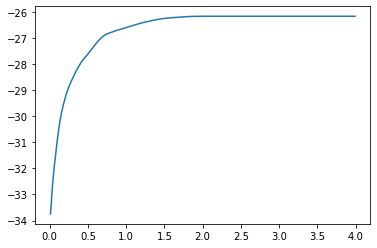

In [41]:
alpha = []
error = []

for i in range(1,400):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [42]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
198,1.99,-26.172941


In [43]:
# With Best Error term
# lasso regression 
lm_l = Lasso(alpha=1.99)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-26.17294082567315

In [48]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 7))

-31.822001337581586

In [49]:
# Tuning models usin g GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [50]:
gs.best_score_

-29.619388638427097

In [51]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [52]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [53]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)

34.828101715483186

In [54]:
mean_absolute_error(y_test,tpred_lml)

31.09335991056882

In [56]:
mean_absolute_error(y_test,tpred_rf)

33.10138379204893

In [57]:
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

33.58921959658855

In [58]:
#Save model
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [59]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

114.11666666666666

In [60]:
del rf,model,tpred_lm,tpred_lml,tpred_rf,gs,lm_l,lm,X,y,df_model,df

In [61]:
#invoke garbage collector to free ram
import gc
gc.collect()

160